In [7]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/TENNIS-CV/tennis-ball-tracker-computer-vision/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/TENNIS-CV/tennis-ball-tracker-computer-vision


In [8]:
!pip install filterpy sktime

In [10]:
!python3 predict_video_3.py --input_video_path=VideoInput/INPUT_play_5.mp4 --output_video_path=VideoOutput/REFATORA-0.mp4 --full_trajectory=1

2024-07-15 13:46:21.991121: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-15 13:46:21.991170: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-15 13:46:21.992668: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-15 13:46:22.001011: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-15 13:46:23.183682: W tensorflow/comp

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import interp1d
import cv2

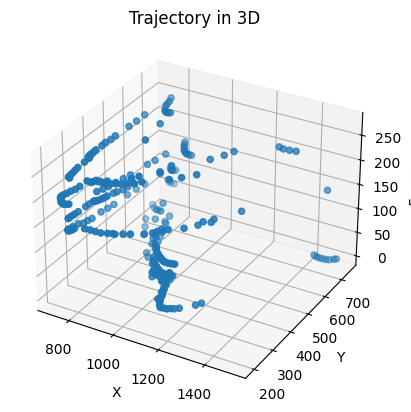

In [ ]:
frame_numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275]
x = [1514, 1508, 1496, 1484, 1471, 1458, 1446, 1434, 1225, 1214, 1173, 1160, 1149, 1139, 1128, 1117, 1109, 1102, 1094, 1071, 1064, 1055, 1046, 1034, 1021, 1008, 906, 885, 804, 778, 749, 715, 738, 755, 836, 857, 884, 900, 924, 1003, 1021, 1124, 1139, 1135, 1133, 1131, 1123, 1120, 1113, 1106, 1104, 1099, 1091, 1083, 1076, 1069, 1060, 1049, 1042, 1032, 1021, 1010, 935, 918, 851, 822, 732, 747, 761, 779, 900, 917, 930, 983, 1014, 1027, 1040, 1069, 1082, 1094, 1142, 1152, 1159, 1155, 1152, 1146, 1133, 1127, 1122, 1113, 1104, 1097, 1089, 1082, 1073, 1063, 1053, 1041, 1033, 1020, 995, 979, 911, 889, 797, 792, 790, 787, 784, 780, 780, 776, 773, 765, 761, 756, 753, 750, 745, 744, 740, 739, 734, 733, 733, 733, 732, 732, 730, 731, 738, 746, 900, 1008, 1033, 1063, 1122, 1158, 1193, 1466, 1256, 1196, 1172, 1088, 1062, 986, 965, 940, 915, 893, 872, 851, 830, 737, 739, 742, 746, 750, 755, 758, 763, 768, 772, 777, 783, 790, 795, 800, 804, 815, 823, 836, 842, 854, 891, 908, 935, 926, 919, 913, 907, 900, 896, 886, 882, 874, 862, 855, 848, 837, 831, 824, 819, 813, 806, 769, 761, 756, 752, 746, 743, 738, 731, 728, 732, 739, 745, 754, 758, 781, 791, 804, 818, 832, 847, 863, 882, 903, 922, 946, 968, 1051, 1085, 1125, 1366, 1342, 1318, 1298, 1167, 1151, 1123, 1040, 1016, 963, 950, 884, 864, 845, 825, 758, 752, 752, 753, 752, 751, 752, 753, 753, 752, 753, 756, 756, 757, 759, 759, 762, 763, 764, 767, 767, 774, 776, 782, 786, 788, 805, 817, 823, 829, 848, 859, 868, 876, 886, 901, 923]
y = [746, 739, 728, 722, 719, 716, 716, 718, 347, 329, 292, 281, 275, 267, 264, 260, 266, 275, 284, 319, 339, 359, 366, 366, 371, 373, 439, 455, 537, 569, 605, 682, 665, 656, 610, 568, 530, 498, 460, 349, 329, 240, 233, 240, 247, 255, 266, 277, 295, 322, 340, 335, 330, 329, 327, 327, 328, 332, 334, 340, 346, 355, 428, 453, 542, 588, 748, 736, 731, 728, 562, 521, 486, 395, 347, 330, 311, 283, 273, 263, 240, 239, 243, 252, 262, 275, 317, 313, 310, 306, 305, 303, 305, 308, 311, 316, 322, 329, 339, 349, 381, 396, 502, 540, 717, 710, 708, 706, 706, 707, 711, 716, 658, 585, 545, 504, 438, 410, 382, 338, 320, 301, 263, 253, 247, 241, 236, 237, 235, 239, 252, 270, 270, 306, 321, 337, 379, 409, 437, 743, 524, 448, 420, 337, 313, 263, 251, 238, 230, 221, 218, 216, 212, 232, 237, 246, 255, 267, 298, 312, 327, 327, 327, 327, 329, 335, 340, 346, 352, 371, 379, 395, 413, 434, 523, 566, 641, 639, 636, 637, 639, 643, 650, 658, 667, 677, 588, 540, 508, 433, 404, 374, 343, 322, 300, 205, 199, 194, 194, 194, 197, 201, 206, 212, 220, 229, 241, 253, 270, 300, 314, 309, 308, 306, 304, 306, 311, 314, 322, 329, 344, 388, 411, 442, 685, 679, 675, 677, 591, 557, 516, 412, 383, 336, 314, 268, 255, 243, 236, 224, 226, 236, 244, 257, 271, 302, 323, 327, 322, 320, 318, 318, 319, 322, 324, 329, 337, 346, 372, 389, 408, 429, 491, 525, 565, 685, 662, 643, 628, 602, 593, 589, 587, 587, 516, 415]

frame_numbers = np.asarray(frame_numbers)
x = np.asarray(x)
y = np.asarray(y)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, frame_numbers)
# Labeling axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Frame')

plt.title('Trajectory in 3D')
plt.show()

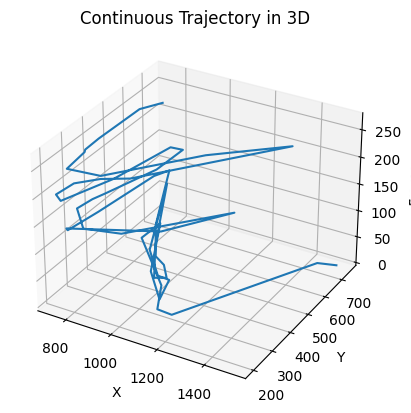

In [ ]:
# Skipping frames by a factor (e.g., 2)
skip_factor = 2

# Interpolate the trajectory points with skipping frames
f_x = interp1d(frame_numbers[::skip_factor], x[::skip_factor], kind='linear', bounds_error=False)
f_y = interp1d(frame_numbers[::skip_factor], y[::skip_factor], kind='linear', bounds_error=False)

# Create a smoother array of frame numbers
new_frame_numbers = np.linspace(frame_numbers.min(), frame_numbers.max(), 50)

# Calculate interpolated values for x and y coordinates
new_x = f_x(new_frame_numbers)
new_y = f_y(new_frame_numbers)


# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(new_x, new_y, new_frame_numbers)

# Labeling axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Frame')

plt.title('Continuous Trajectory in 3D')
plt.show()


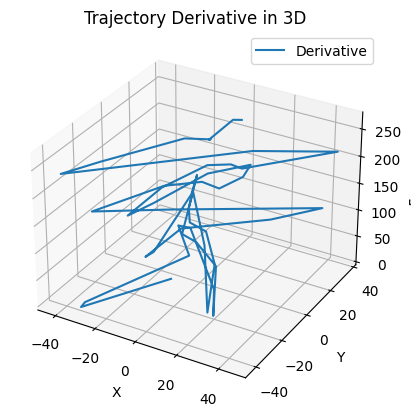

In [ ]:
# Calculate the derivatives of x and y
derivative_x = np.gradient(new_x, new_frame_numbers)
derivative_y = np.gradient(new_y, new_frame_numbers)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(derivative_x, derivative_y, new_frame_numbers, label='Derivative')

# Labeling axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Frame')

plt.title('Trajectory Derivative in 3D')
plt.legend()
plt.show()

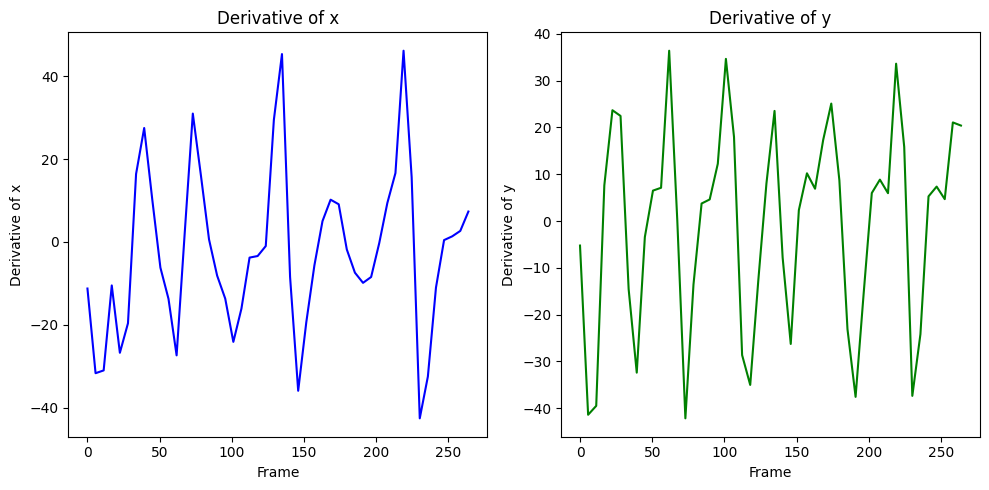

In [ ]:
# Plotting the derivatives in two separate 2D plots
plt.figure(figsize=(10, 5))

# Plot derivative of x
plt.subplot(1, 2, 1)
plt.plot(new_frame_numbers, derivative_x, label='Derivative of x', color='blue')
plt.xlabel('Frame')
plt.ylabel('Derivative of x')
plt.title('Derivative of x')

# Plot derivative of y
plt.subplot(1, 2, 2)
plt.plot(new_frame_numbers, derivative_y, label='Derivative of y', color='green')
plt.xlabel('Frame')
plt.ylabel('Derivative of y')
plt.title('Derivative of y')

plt.tight_layout()
plt.show()

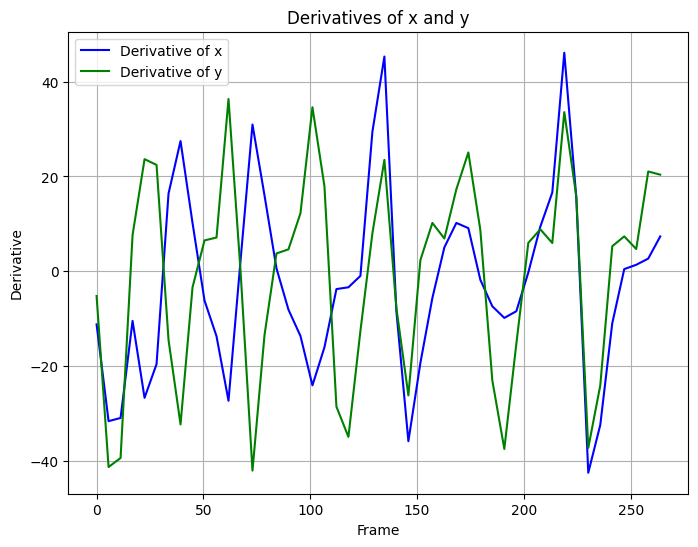

In [ ]:
# Plotting both derivatives on the same graph
plt.figure(figsize=(8, 6))

# Plot derivative of x
plt.plot(new_frame_numbers, derivative_x, label='Derivative of x', color='blue')

# Plot derivative of y
plt.plot(new_frame_numbers, derivative_y, label='Derivative of y', color='green')

plt.xlabel('Frame')
plt.ylabel('Derivative')
plt.title('Derivatives of x and y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate the second derivatives of x and y
second_derivative_x = np.gradient(derivative_x, new_frame_numbers)
second_derivative_y = np.gradient(derivative_y, new_frame_numbers)

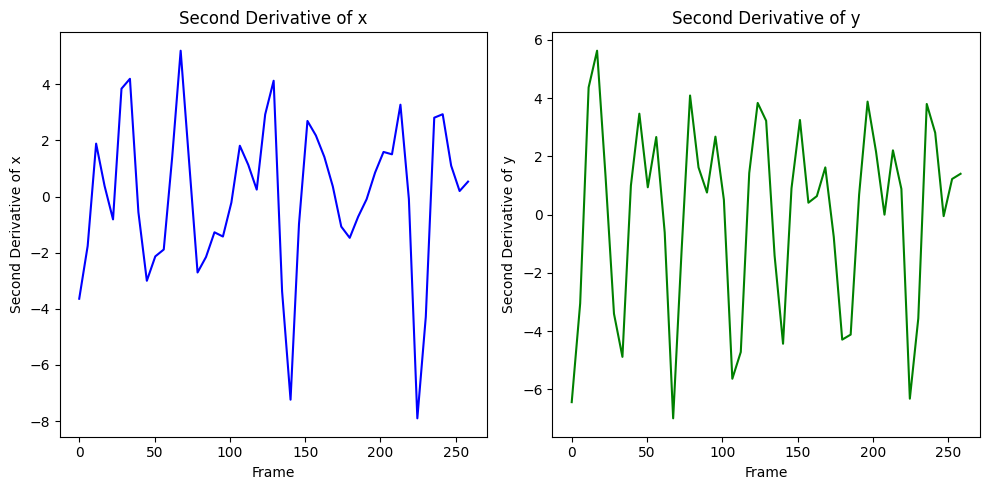

In [ ]:
# Plotting the second derivatives in two separate 2D plots
plt.figure(figsize=(10, 5))

# Plot second derivative of x
plt.subplot(1, 2, 1)
plt.plot(new_frame_numbers, second_derivative_x, label='Second Derivative of x', color='blue')
plt.xlabel('Frame')
plt.ylabel('Second Derivative of x')
plt.title('Second Derivative of x')

# Plot derivative of y
plt.subplot(1, 2, 2)
plt.plot(new_frame_numbers, second_derivative_y, label='Second Derivative of y', color='green')
plt.xlabel('Frame')
plt.ylabel('Second Derivative of y')
plt.title('Second Derivative of y')

plt.tight_layout()
plt.show()

In [ ]:
# Find points of inflection (where the second derivative changes sign)
inflection_points_x = new_frame_numbers[np.where(np.diff(np.sign(second_derivative_x)))[0]]
inflection_points_y = new_frame_numbers[np.where(np.diff(np.sign(second_derivative_y)))[0]]

print("Points of inflection for x:")
for frame in inflection_points_x:
    print(f"Frame: {frame:.2f}, x: {f_x(frame):.2f}, y: {f_y(frame):.2f}")

print("\nPoints of inflection for y:")
for frame in inflection_points_y:
    print(f"Frame: {frame:.2f}, x: {f_x(frame):.2f}, y: {f_y(frame):.2f}")


Points of inflection for x:
Frame: 5.61, x: 1450.85, y: 716.58
Frame: 16.84, x: 1102.72, y: 273.53
Frame: 22.45, x: 1040.39, y: 367.12
Frame: 33.67, x: 820.00, y: 618.98
Frame: 56.12, x: 1058.90, y: 328.37
Frame: 72.96, x: 970.29, y: 419.34
Frame: 101.02, x: 952.14, y: 442.73
Frame: 129.08, x: 734.33, y: 244.19
Frame: 145.92, x: 968.96, y: 253.53
Frame: 168.37, x: 807.49, y: 356.96
Frame: 190.82, x: 826.10, y: 379.10
Frame: 213.27, x: 836.35, y: 305.47
Frame: 230.10, x: 1117.54, y: 509.21
Frame: 258.16, x: 767.57, y: 374.94
Frame: 263.78, x: 787.33, y: 556.69
Frame: 269.39, x: 849.82, y: 603.71

Points of inflection for y:
Frame: 5.61, x: 1450.85, y: 716.58
Frame: 22.45, x: 1040.39, y: 367.12
Frame: 33.67, x: 820.00, y: 618.98
Frame: 56.12, x: 1058.90, y: 328.37
Frame: 72.96, x: 970.29, y: 419.34
Frame: 101.02, x: 952.14, y: 442.73
Frame: 112.24, x: 771.53, y: 644.16
Frame: 129.08, x: 734.33, y: 244.19
Frame: 140.31, x: 1243.14, y: 508.08
Frame: 168.37, x: 807.49, y: 356.96
Frame: 185.

In [ ]:
# Find inflection points with the same frame for both x and y
same_frame_points = [frame for frame in inflection_points_x if frame in inflection_points_y]

# Find inflection points with different frames for x and y
diff_frame_points_x = [frame for frame in inflection_points_x if frame not in inflection_points_y]
diff_frame_points_y = [frame for frame in inflection_points_y if frame not in inflection_points_x]

print("Inflection points with the same frame for both x and y:", same_frame_points)
print("Inflection points with different frames for x:", diff_frame_points_x)
print("Inflection points with different frames for y:", diff_frame_points_y)

Inflection points with the same frame for both x and y: [5.612244897959184, 22.448979591836736, 33.673469387755105, 56.12244897959184, 72.9591836734694, 101.02040816326532, 129.08163265306123, 168.3673469387755, 230.10204081632654, 258.16326530612247, 263.7755102040816, 269.38775510204084]
Inflection points with different frames for x: [16.836734693877553, 145.9183673469388, 190.81632653061226, 213.26530612244898]
Inflection points with different frames for y: [112.24489795918367, 140.3061224489796, 185.20408163265307, 202.04081632653063, 207.65306122448982, 218.87755102040816, 241.3265306122449, 246.9387755102041]


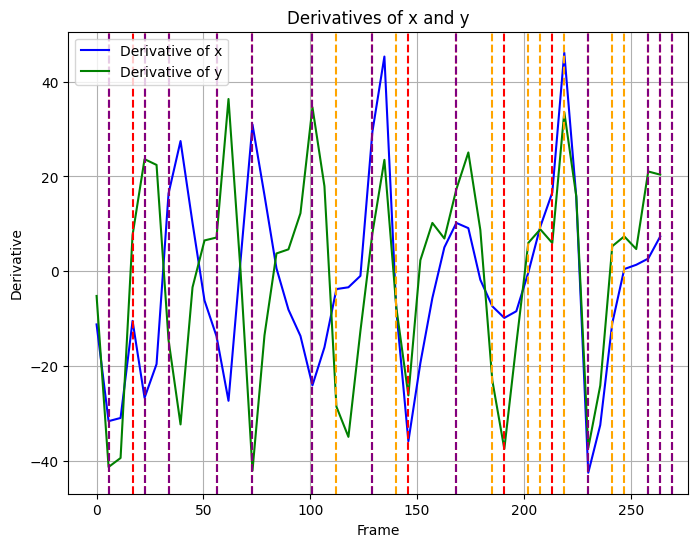

In [ ]:
# Plotting both derivatives on the same graph
plt.figure(figsize=(8, 6))

# Plot derivative of x
plt.plot(new_frame_numbers, derivative_x, label='Derivative of x', color='blue')

# Plot derivative of y
plt.plot(new_frame_numbers, derivative_y, label='Derivative of y', color='green')

# Add vertical lines for inflection points
for inflection_point in inflection_points_x:
    plt.axvline(x=inflection_point, color='red', linestyle='--')

for inflection_point in inflection_points_y:
    if inflection_point in inflection_points_x:
        plt.axvline(x=inflection_point, color='purple', linestyle='--')
    else:
        plt.axvline(x=inflection_point, color='orange', linestyle='--')

plt.xlabel('Frame')
plt.ylabel('Derivative')
plt.title('Derivatives of x and y')
plt.legend()
plt.grid(True)
plt.show()

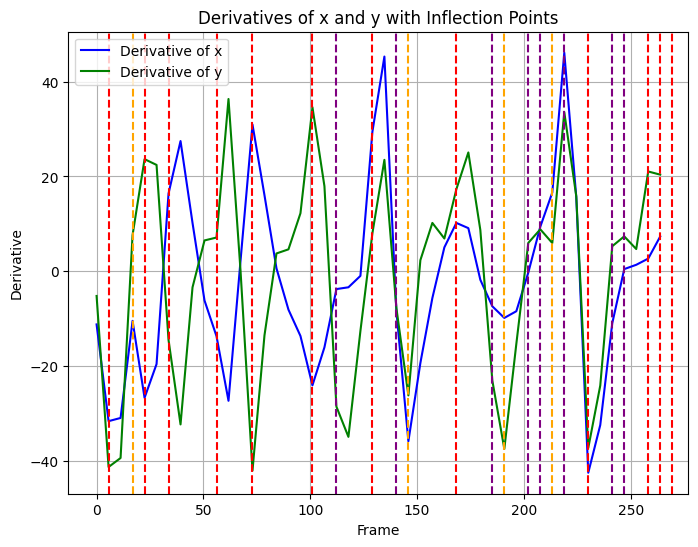

In [ ]:
# Plotting both derivatives on the same graph
plt.figure(figsize=(8, 6))

# Plot derivative of x
plt.plot(new_frame_numbers, derivative_x, label='Derivative of x', color='blue')

# Plot derivative of y
plt.plot(new_frame_numbers, derivative_y, label='Derivative of y', color='green')

# Add vertical lines for inflection points with the same frame for both x and y
for frame_num in same_frame_points:
    plt.axvline(x=frame_num, color='red', linestyle='--')

# Add vertical lines for inflection points with different frames for x and y
for frame_num in diff_frame_points_x:
    plt.axvline(x=frame_num, color='orange', linestyle='--')

for frame_num in diff_frame_points_y:
    plt.axvline(x=frame_num, color='purple', linestyle='--')

plt.xlabel('Frame')
plt.ylabel('Derivative')
plt.title('Derivatives of x and y with Inflection Points')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Concatenate and sort inflection points by frame number
all_inflection_points = sorted(same_frame_points + diff_frame_points_x + diff_frame_points_y)

In [ ]:
# Load the video
video_path = 'VideoOutput/teste_3d_0_cut5.mp4'
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Unable to open video.")
    exit()

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
# Display frames corresponding to inflection points with the same frame for both x and y
for frame_num in all_inflection_points:
    # Set the frame number
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

    # Read the frame
    ret, frame = cap.read()

    # Check if frame was read successfully
    if not ret:
        print(f"Error: Unable to read frame {frame_num}.")
        continue

    # Display the frame
    cv2_imshow(frame)
    cv2.waitKey(0)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Display frames corresponding to inflection points with the same frame for both x and y
for frame_num in same_frame_points:
    # Set the frame number
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

    # Read the frame
    ret, frame = cap.read()

    # Check if frame was read successfully
    if not ret:
        print(f"Error: Unable to read frame {frame_num}.")
        continue

    # Display the frame
    cv2_imshow(frame)
    cv2.waitKey(0)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Display frames corresponding to inflection points with the same frame for both x and y
for frame_num in same_frame_points:
    # Set the frame number
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

    # Read the frame
    ret, frame = cap.read()

    # Check if frame was read successfully
    if not ret:
        print(f"Error: Unable to read frame {frame_num}.")
        continue

    # Display the frame
    cv2_imshow(frame)
    cv2.waitKey(0)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Display frames corresponding to inflection points with different frames for x
for frame_num in diff_frame_points_x:
    # Set the frame number
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

    # Read the frame
    ret, frame = cap.read()

    # Check if frame was read successfully
    if not ret:
        print(f"Error: Unable to read frame {frame_num}.")
        continue

    # Display the frame
    cv2_imshow(frame)
    cv2.waitKey(0)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Display frames corresponding to inflection points with different frames for y
for frame_num in diff_frame_points_y:
    # Set the frame number
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

    # Read the frame
    ret, frame = cap.read()

    # Check if frame was read successfully
    if not ret:
        print(f"Error: Unable to read frame {frame_num}.")
        continue

    # Display the frame
    cv2_imshow(frame)
    cv2.waitKey(0)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Release the video capture object
cap.release()